In [83]:
# Import Statements
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation


0.4375
weights:  [[0.000375]
 [0.000875]]
0.4356894023437501
weights:  [[0.00074916]
 [0.00174819]]
0.43388639808261764
weights:  [[0.00112247]
 [0.00261957]]
0.4320909553407218
weights:  [[0.00149494]
 [0.00348914]]
0.43030304237600003
weights:  [[0.00186658]
 [0.00435691]]
0.42852262757964726
weights:  [[0.00223738]
 [0.00522289]]
0.4267496794755561
weights:  [[0.00260734]
 [0.00608707]]
0.4249841667197598
weights:  [[0.00297647]
 [0.00694946]]
0.42322605809987734
weights:  [[0.00334477]
 [0.00781007]]
0.42147532253456144
weights:  [[0.00371224]
 [0.00866889]]
0.41973192907294815
weights:  [[0.00407889]
 [0.00952594]]
0.41799584689410907
weights:  [[0.0044447 ]
 [0.01038121]]
0.4162670453065056
weights:  [[0.00480969]
 [0.01123471]]
0.4145454937474466
weights:  [[0.00517386]
 [0.01208644]]
0.41283116178254664
weights:  [[0.00553721]
 [0.01293641]]
0.4111240191051875
weights:  [[0.00589974]
 [0.01378462]]
0.40942403553598217
weights:  [[0.00626145]
 [0.01463107]]
0.40773118102224015
w

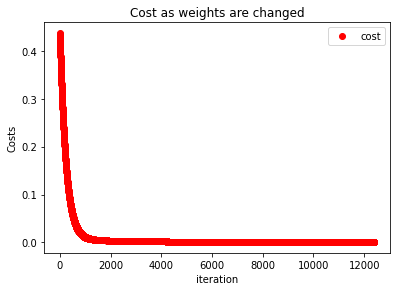

In [84]:

def createData():
    data = np.array([[1,0,0],[1,1,0.5],[1,2,1],[1,3,1.5]]).astype(float)

    x = data[:, 0:-1]
    y = data[:, -1]
    return x,y
#2 ********
def calcCost(X,W,Y):
    predictions = np.dot(X,W)
    predictions = np.reshape(predictions, Y.shape)
    cost = 1/(2*len(Y))*np.sum((predictions-Y)**2)
    return cost

#3 ************ Complete the code that calculates 1/m * d/dw (cost function)
def calcGradient(X,W,Y):
    predictions = np.dot(X,W)
    cost = predictions-np.reshape(Y, (len(Y),1))
    
    #predictions = np.broadcast_to(predictions, (len(X), len(X[0])))
    grad = 1/len(Y)*(np.dot(np.reshape(cost, (len(cost[0]), len(cost))), X))
    return np.reshape(grad, (len(grad[0]), 1))

#1b ********* Call and test the createData() function, create the weights array
# =============================================================================
# X,Y use createData method to create the X,Y matrices
# Weights - Create initial weight matrix (number of weights should be the same
# as the number of features)
# Weights - should be set to 0
# =============================================================================
#   

X,Y = createData()

numCols = len(X[0])
W = np.zeros((numCols, 1))

# set learning rate - the list is if we want to try multiple LR's
# We are only doing one of them today
lrList = [.3,.0005]
lr = lrList[1]
#set up the cost array for graphing
costArray = []
costArray.append(calcCost(X, W, Y))
#initalize while loop flags
finished = False
count =0
print(calcCost(X,W,Y))
while (not finished and count <100000):
    gradient = calcGradient(X,W,Y)
    print
    #4 *********** update weights --------------------------------
    W = W - gradient*lr
    print("weights: ", W)
    print(calcCost(X,W,Y))
    costArray.append(calcCost(X, W, Y))
    lengthOfGradientVector = np.linalg.norm(gradient)
    if (lengthOfGradientVector < .01):
        finished=True
    count+=1

# Create figure objects
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])# [left, bottom, width, height]
ax.plot(np.arange(len(costArray)), costArray, "ro", label = "cost")
ax.set_title("Cost as weights are changed")
ax.set_xlabel("iteration")
ax.set_ylabel("Costs")
ax.legend()
plt.show()


